In [14]:
# imports general modules, runs ipython magic commands
# change path in this notebook to point to repo locally
# n.b. sometimes need to run this cell twice to init the plotting paramters
%run ../setup_notebook.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# general imports
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import colors as mcolors
import seaborn as sns
from subsets_analysis import Subsets
from run_functions import filter_trials
import time

In [16]:
# notebook specific imports
import pickle
import utils_funcs as utils
import re

In [17]:
# global plotting params
sns.set()
sns.set_style('white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'lines.markersize': 15}

plt.rc("axes.spines", top=False, right=False) # despine

plt.rcParams.update(params)


In [18]:
mice_dicts = [
    
{'mouse_id': 'J048', 'run_numbers': [27,28,29,30,32], 'runs': []},
{'mouse_id': 'RL048', 'run_numbers': [23, 24, 25, 28, 29], 'runs': []},
{'mouse_id': 'J063', 'run_numbers': [8,9,10,11,12,13,14], 'runs': []},
{'mouse_id': 'J064', 'run_numbers': [10,11,12,13,14,15], 'runs': []},
{'mouse_id': 'J065', 'run_numbers': [10,11,12,13,14,15], 'runs': []},
    
]

In [32]:
for mouse_dict in mice_dicts:
    for run_number in mouse_dict['run_numbers']:
        
        pkl_path = os.path.join(path_to_vape, 'run_pkls', mouse_dict['mouse_id'], 
                                'run{}.pkl'.format(run_number))

        with open(pkl_path, 'rb') as f:
            run = pickle.load(f)
            
        mouse_dict['runs'].append(run)
                

In [20]:
def trial_outcomes(outcome):

    go_outcome = []
    nogo_outcome = []

    for t in outcome:
        if t == 'hit':
            go_outcome.append(True)
        elif t == 'miss':
            go_outcome.append(False)
        elif t =='cr':
            nogo_outcome.append(False)
        elif t == 'fp':
            nogo_outcome.append(True)

    go_outcome = np.array(go_outcome)
    nogo_outcome = np.array(nogo_outcome)
    
    return go_outcome, nogo_outcome

In [146]:
def get_subset_dprime(run):
    
    ''' get the d-prime for each subset in a run.
        Returns nan if < 10 trials of a subset in a session
        '''

    good_idxs = filter_trials(run, dp_thresh=2)
    outcome = np.array(run.outcome)[good_idxs]
    trial_info = np.array(run.trial_info)[good_idxs]
    
    go_outcome, nogo_outcome = trial_outcomes(outcome)
    trial_subsets = []
    
    for i, info in enumerate(trial_info):
        if 'Nogo Trial' in info:
            continue
        elif 'all_cells_stimulated' in info:
            trial_subsets.append(150)
        elif 'Subset cells experiment' in info:
            trial_subset = int(re.search('(?<=stimulating )(.*)(?= cells)', info).group(0))
            trial_subsets.append(trial_subset)

    group_dict = {
        0: '0',
        5: '5-10',
        10: '5-10',
        20: '20-30',
        30: '20-30',
        40: '40-50',
        50: '40-50',
        150: '150'
    }
    
    trial_subsets = [group_dict[sub] for sub in trial_subsets]
    trial_subsets = np.array(trial_subsets)
    subsets = ['0', '5-10', '20-30', '40-50', '150']
        
    fp_rate = sum(nogo_outcome) / len(nogo_outcome)
    subset_rate = []
        
    assert len(go_outcome) == len(trial_subsets), '{} {}'.format(len(trial_subsets), len(go_outcome))
    for sub in subsets:
        subset_idx = np.where(trial_subsets == sub)[0]
        if len(subset_idx) < 10:
            subset_rate.append(np.nan)
        else:
            subset_rate.append(sum(go_outcome[subset_idx]) / len(subset_idx))

    subsets_dprime = [utils.d_prime(rate, fp_rate) for rate in subset_rate]
    subsets_dprime = subset_rate
    return subsets, subsets_dprime, fp_rate
    

In [159]:
def get_psychometric(runs):
    
    across_sessions = []
    fp_rates = []

    
    for run in runs:
        n_hits = len(np.where(run.outcome=='hit')[0])
        n_go = len(np.where(np.array(run.trial_type)=='go')[0])
        session_hitrate = n_hits / n_go
        session_fprate = len(np.where(run.outcome=='fp')[0]) / (len(run.outcome) - n_go)
        
        session_dprime = utils.d_prime(session_hitrate, session_fprate)
        
        if session dp
        print(session_dprime)
        
        
        global subsets  # hackkkkkkk
        subsets, subsets_dprime, fp_rate = get_subset_dprime(run)

        across_sessions.append(subsets_dprime)
        fp_rates.append(fp_rate)

    across_sessions = np.array(across_sessions)   
    meaned = np.nanmean(across_sessions, 0)
    
    # Currently returning mean of fp rate to avoid
    # session speicific info in dict
    return meaned, np.mean(fp_rates)

In [160]:
for mouse_dict in mice_dicts:
    dprimes, fp_rate = get_psychometric(mouse_dict['runs'])
    mouse_dict['dprimes'] = dprimes
    mouse_dict['fp_rate'] = fp_rate

across_mice = np.array([mouse_dict['dprimes'] for mouse_dict in mice_dicts])

0.47532088135587114
0.8770490727654598
0.5615959836190809
0.9551947549529192
0.80047201616639
0.47532088135587114
0.8770490727654598
0.5615959836190809
0.9551947549529192
0.80047201616639
1.247907741000524
1.3841923813543293
0.8041461641939575
0.9510214652008144
0.7173315037864484
1.247907741000524
1.3841923813543293
0.8041461641939575
0.9510214652008144
0.7173315037864484
0.9055432748958452
0.8644584621450653
0.9897986050688992
0.8490938023153679
0.7219201131018194
0.6408836673947628
0.8600930287987082
0.9055432748958452
0.8644584621450653
0.9897986050688992
0.8490938023153679
0.7219201131018194
0.6408836673947628
0.8600930287987082
0.8877384963637647
1.213700596502556
0.8953442942999816
1.407841156382752
0.9050668313150148
0.7276596208929305
0.8877384963637647
1.213700596502556
0.8953442942999816
1.407841156382752
0.9050668313150148
0.7276596208929305
1.056071794133022
0.5070935694416584
0.7371004911482336
0.8191947437775873
0.8766244467135869
0.5878860028166066
1.056071794133022
0.5

In [149]:
mice_dicts[0]

{'mouse_id': 'J048',
 'run_numbers': [27, 28, 29, 30, 32],
 'runs': [<opto_stim_import2.BlimpImport at 0x7fd996089f90>,
 'dprimes': array([       nan, 0.21746032, 0.35227273,        nan, 0.9507215 ]),
 'fp_rate': 0.23969017094017095}

In [150]:
np.unique(Subsets(run).trial_subsets)

array([  0,   5,  10,  20,  30,  40,  50, 150])

(0, 1)

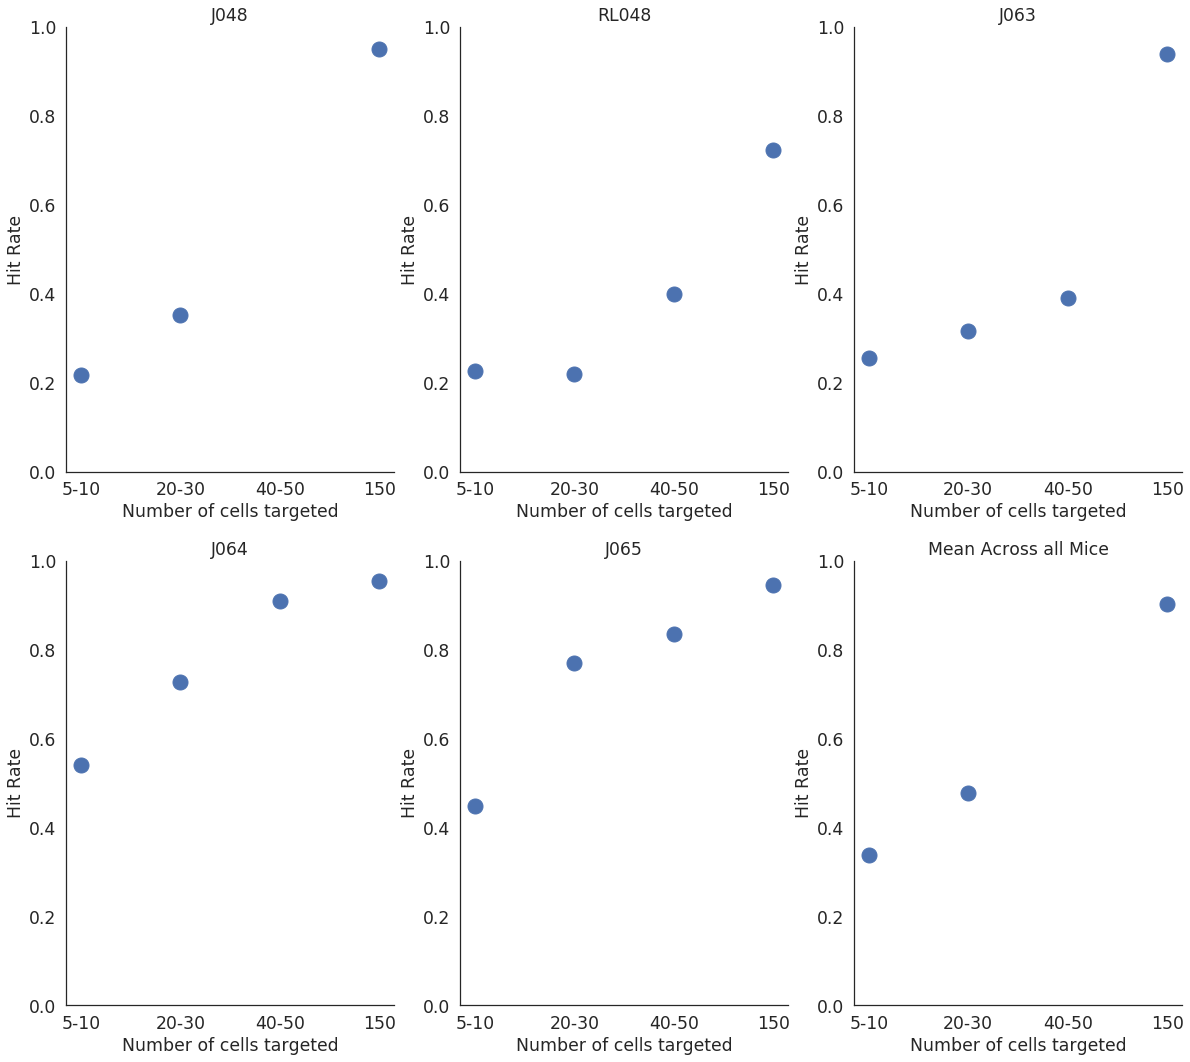

In [151]:
plt.figure(figsize=(20,18))
y_min = 0
y_max = 1


plot_idx = 0
for mouse_dict in mice_dicts:
    plot_idx += 1
    plt.subplot(2, 3, plot_idx)
    plt.plot(subsets, mouse_dict['dprimes'], '.', markersize=30)
    plt.xlabel('Number of cells targeted')
    plt.ylabel('Hit Rate')
    plt.title(mouse_dict['mouse_id'])
    plt.ylim((y_min, y_max))
    
plt.subplot(2,3,6)
plt.plot(subsets, np.mean(across_mice, 0), '.', markersize=30)
plt.xlabel('Number of cells targeted')
plt.ylabel('Hit Rate')
plt.title('Mean Across all Mice')
plt.ylim((y_min, y_max))


In [145]:
run = mice_dicts[0]['runs'][1]
# hit_rate = len(np.where(run.outcome=='hit')[0]) / num_go 
fp_rate = len(np.where(run.outcome=='fp')[0]) / num_nogo
session_dprime = utils.d_prime(hit_rate, fp_rate)
session_dprime

NameError: name 'num_nogo' is not defined

In [27]:
len(run.trial_info)

211

In [28]:
len(run.outcome)

211

In [152]:
print(run.__dict__.keys())

dict_keys(['mouse_id', 'df', 'rows_2p', 'rows_1p', 'dates_2p', 'paqs', 'naparm_folders', 'blimp_folders', 'pycontrol_folders', 'prereward_folders', 'tseries_folders', 'plane_numbers', 'run_pycontrol_txt', 'num_planes', 'blimp_path', 'naparm_path', 'pycontrol_path', 'paq_path', 'prereward_path', 'tseries_paths', 'align_barcode', 'trial_info', 'session', 'print_lines', 'trial_time', 'outcome', 'slm_barcode', 'slm_trial_number', 'nogo_barcode', 'nogo_trial_number', 'alltrials_barcodes', 'rsync', 'trial_start', 'paq_rsync', 'frame_clock', 'x_galvo_uncaging', 'slm2packio', 'paq_rate', 'aligner', 'paq_correct', 'pre_rsync', 'pre_licks', 'pre_reward', 'prereward_aligner', 'both_aligner', 'num_frames', 's2p_path', 'flu_raw', 'frames_ms', 'frames_ms_pre', 'flu', 'spks', 'stat'])


In [ ]:
#licks are binned and normalised to trial start time (5ms before LED pulse)
binned_licks = np.array(run.binned_licks)

trial_type = np.array(run.trial_type)

sorted_licks = binned_licks[trial_idxs]
trial_subsets = Subsets(run).trial_subsets
trial_idxs = trial_subsets.argsort()
sorted_subsets = trial_subsets[trial_idxs]

num_trials = len(run.outcome)
num_go = len(np.where(trial_type=='go')[0])
num_nogo = len(np.where(trial_type=='nogo')[0])

In [ ]:
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]
#sorted_names

start_color = 0

color_map = {}

for i, sub in enumerate(np.unique(trial_subsets)):
    color_map[sub] = sorted_names[start_color+i*20]

subset_colors = [color_map[i] for i in trial_subsets[trial_idxs]]






In [ ]:
plt.figure(figsize=[10,16])

for i, b in enumerate(sorted_licks):
    
    color=subset_colors[i]
    y_axis = np.ones(len(b)) + i
    
    if sorted_subsets[i] != sorted_subsets[i-1]:
        label = sorted_subsets[i]
    else:
        label = None
    plt.plot(b/1000, y_axis,'.', c=color, label=label)
    
plt.fill_between([0,1], 0, num_trials+5, color='lightblue', alpha=0.5)
plt.xlim((0,4))
sns.despine()
plt.xlabel('Time (s)')
plt.ylabel('Trials')
plt.ylim((0,num_trials+5))
plt.legend()
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='right', fontsize=40)
#plt.savefig(os.path.join(figure_path, 'lick_raster.png'))
#plt.savefig(os.path.join(figure_path, 'lick_raster.svg'))

In [ ]:
filtered = filter_trials(run, window_size=6, plot=True)

In [ ]:
len(filtered)

In [ ]:
subsets = Subsets(rn)
np.where((subsets.trial_subsets!=150) & (subsets.trial_subsets!=0))[0]

In [ ]:
run.trial_typeaaaaaaaa

In [ ]:
run.trial_type



## Not sure what the purpose of this code is

In [ ]:
def subsets_hit_fp(run):
    
    ''' Hacky function code copied from above to get out
        dprimes calculated across all sessions
        '''
    
    go_outcome, nogo_outcome = trial_outcomes(run.outcome)
    
    trial_subsets = []

    for i, info in enumerate(run.trial_info):
        if 'Nogo Trial' in info:
            continue
        elif 'all_cells_stimulated' in info:
            trial_subsets.append(150)
        elif 'Subset cells experiment' in info:
            trial_subset = int(re.search('(?<=stimulating )(.*)(?= cells)', info).group(0))
            trial_subsets.append(trial_subset)

    trial_subsets = np.array(trial_subsets)
    global subsets # lol
    subsets = np.sort(np.unique(trial_subsets))
    assert len(trial_subsets) == len(go_outcome), 'dsdsd {} {}'.format(len(trial_subsets), len(go_outcome))
    
    subby = [] # list of lists
    
    for sub in subsets:
        subset_idx = np.where(trial_subsets == sub)[0]
        subby.append(go_outcome[subset_idx])
        
        
    fp_rate = sum(nogo_outcome) / len(nogo_outcome)
    
    return subby, fp_rate
        

In [ ]:
fp_rates = []


for i, run_number in enumerate(run_numbers):
    pkl_path = os.path.join(path_to_vape, 'run_pkls', mouse_id, 'run{}.pkl'.format(run_number))
    print(i)
    with open(pkl_path, 'rb') as f:
        run = pickle.load(f)
        
    subby, fp_rate = subsets_hit_fp(run)
    fp_rates.append(fp_rate)
    
    if i == 0:    
        all_subbys = subby
    
    else:
        for i, lst in enumerate(all_subbys):   
            all_subbys[i] = np.append(lst, subby[i])

In [ ]:
# change this need to sum and divide by len across all sessions
fp_rate = np.mean(fp_rates)
fp_rate

In [ ]:
hit_rates = []

dprimes = []

for i,sub in enumerate(all_subbys):
    hit_rate = sum(sub) / len(sub)
    print(len(sub))
    dprimes.append(utils.d_prime(hit_rate, fp_rate))

In [ ]:
plt.plot(subsets, dprimes, '.')
plt.xlabel('Number of Cells Targeted')
plt.ylabel('d-prime')
plt.title('{} number of sessions = {}'.format(mouse_id, len(fp_rates)))
plt.ylim((-0.1,1.5))